# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
#independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [3]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [5]:
##Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state= 0) 

In [6]:
x_train

,variance,skewness,curtosis,entropy
122,-1.45720,9.121400,1.742500,-5.124100
1356,-4.07860,2.923900,0.870260,-0.653890
1015,-0.90784,-7.902600,6.780700,0.341790
1163,0.68180,4.850400,-5.213300,-6.104300
1034,0.67886,4.119900,-4.569000,-4.141400
...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840
835,-0.94255,0.039307,-0.241920,0.315930
1216,0.60050,0.999450,-2.212600,0.097399
559,2.01650,-0.252460,5.170700,1.076300


In [7]:
###Implement RF classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
### Prediction

y_pred = classifier.predict(x_test)

In [9]:
#check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9902912621359223

C:\Users\onward.SEZONWARD\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onward.SEZONWARD\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

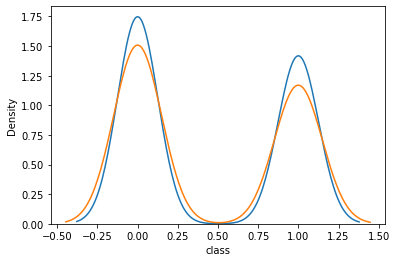

In [10]:
#train vs test 
sns.distplot(y_train,hist=False, bins=10)
sns.distplot(y_test,hist=False, bins=10)

In [11]:
### Create a pickle file using serialization

import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()


In [12]:
classifier.predict([[-3,2,0,9]])

array([1], dtype=int64)